In [21]:
import numpy as np
import sys, getopt
import pandas as pd
from scipy import stats, integrate
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.spatial import distance
import matplotlib.pyplot as plt


In [26]:
path_accuracy = "../data/cifar100_subresnet_accuracy.xlsx"
path_energy = "../data/cifar10_subresnet_energy.xlsx"

teacher_accuracy = 0.800023
teacher_energy = 30421.63057622

df_accuracy = pd.read_excel(path_accuracy)
df_energy = pd.read_excel(path_energy)
df_energy = df_energy[df_energy['Network'] != 'subResNet-08']
df_accuracy = df_accuracy[df_accuracy['Network'] != 'subResNet-08']

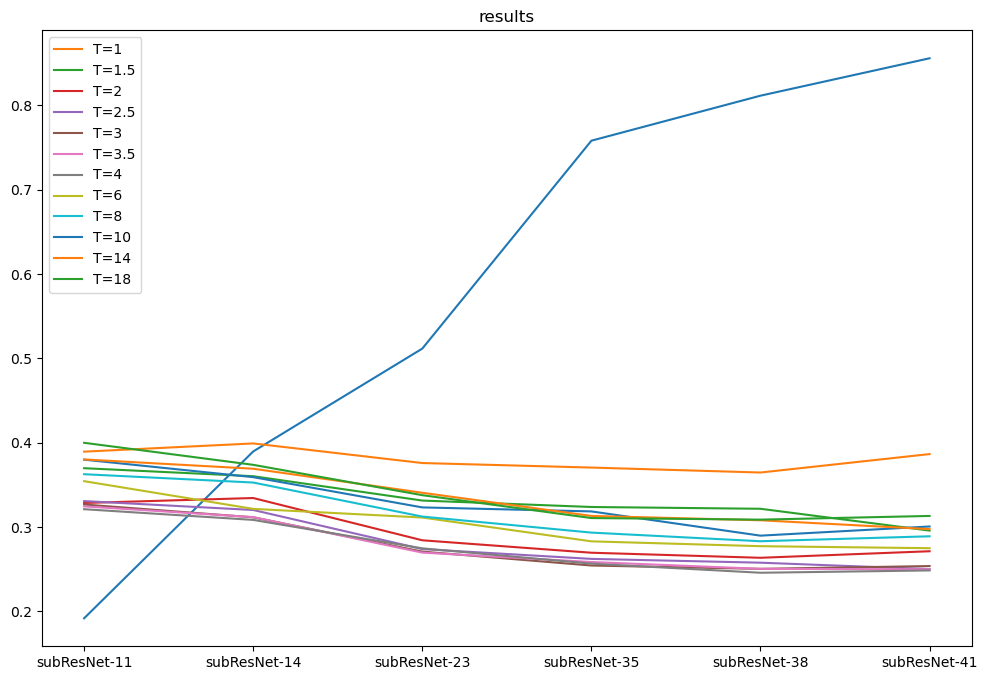

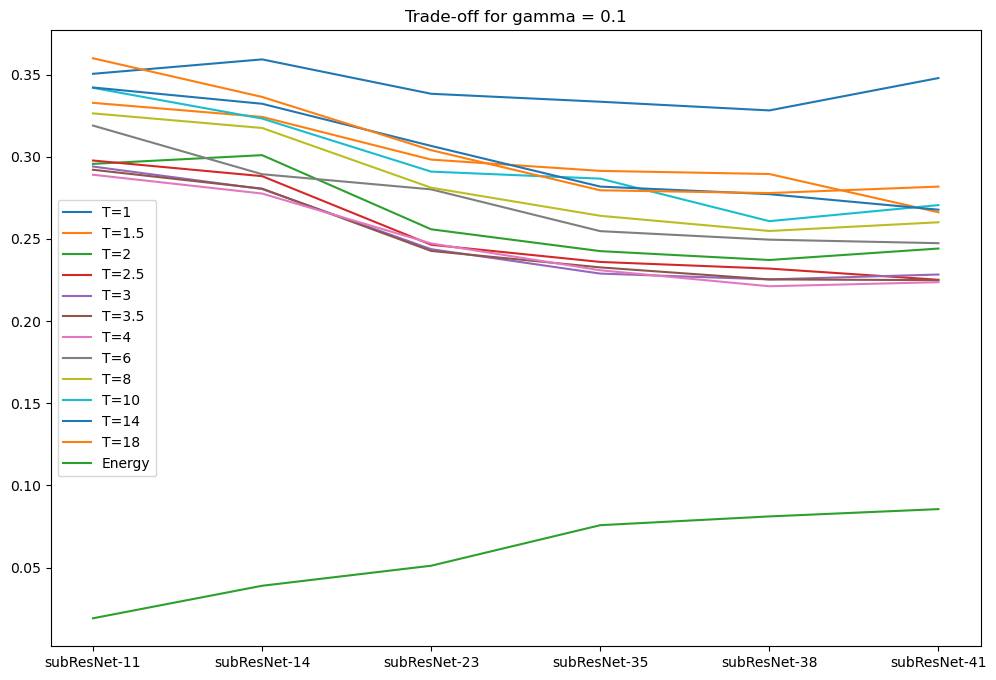

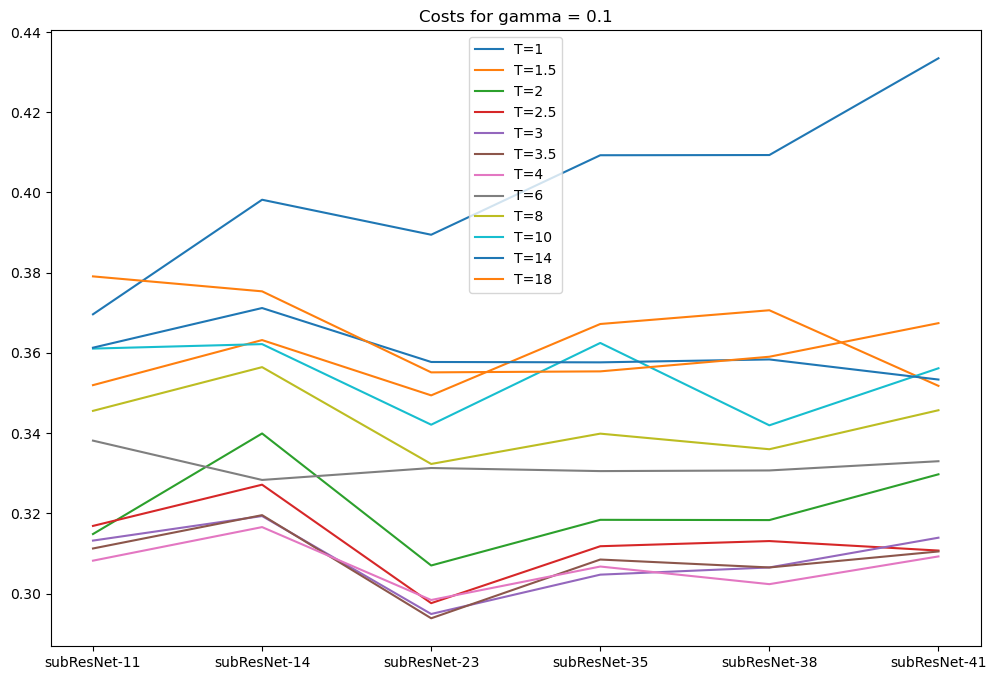

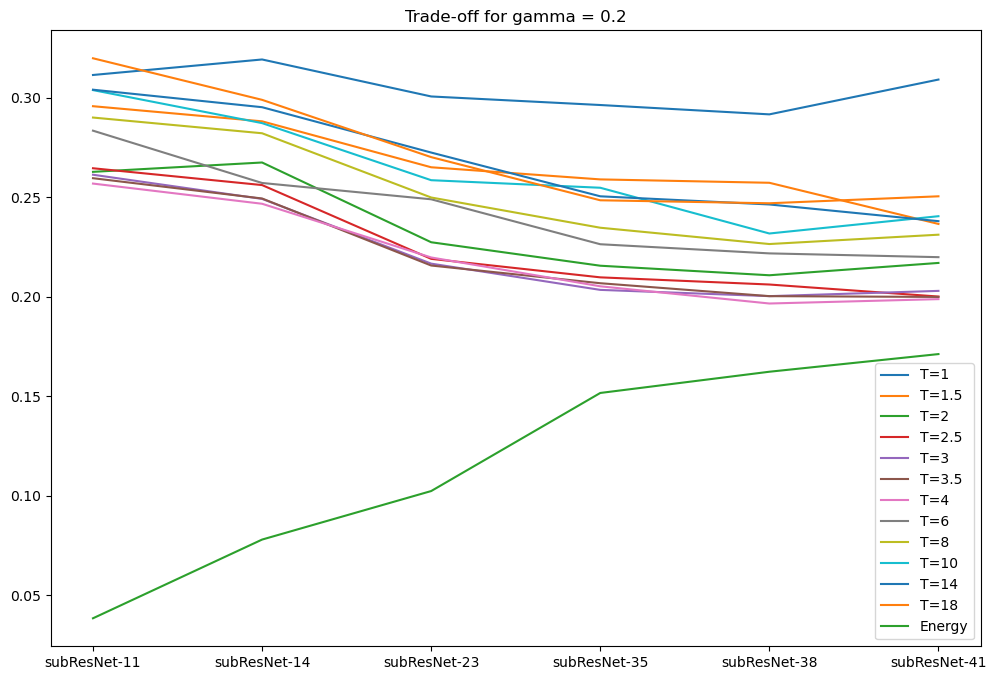

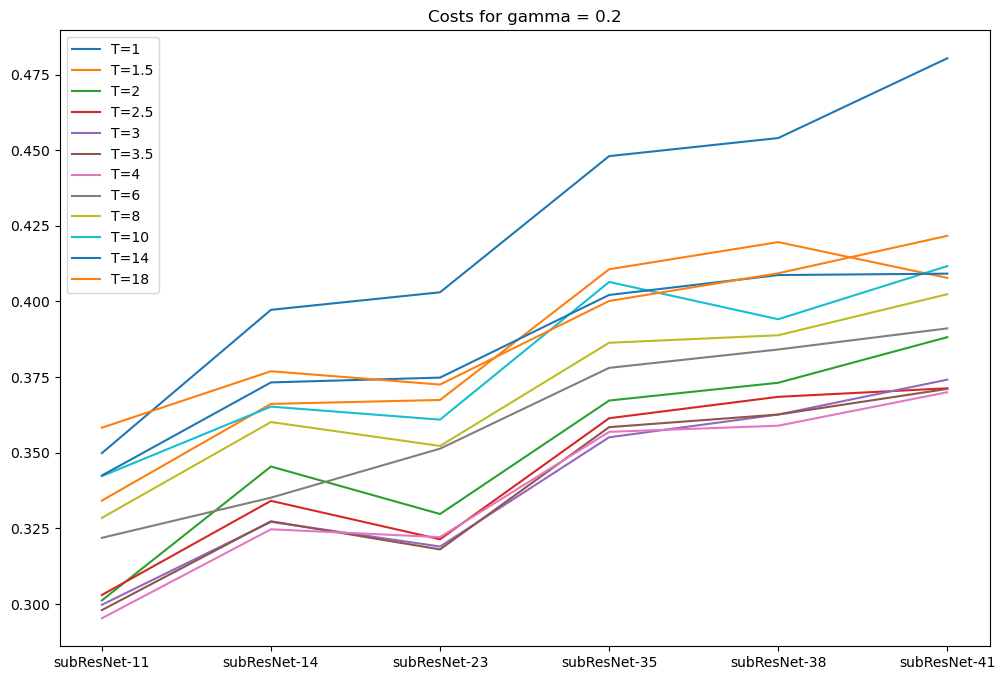

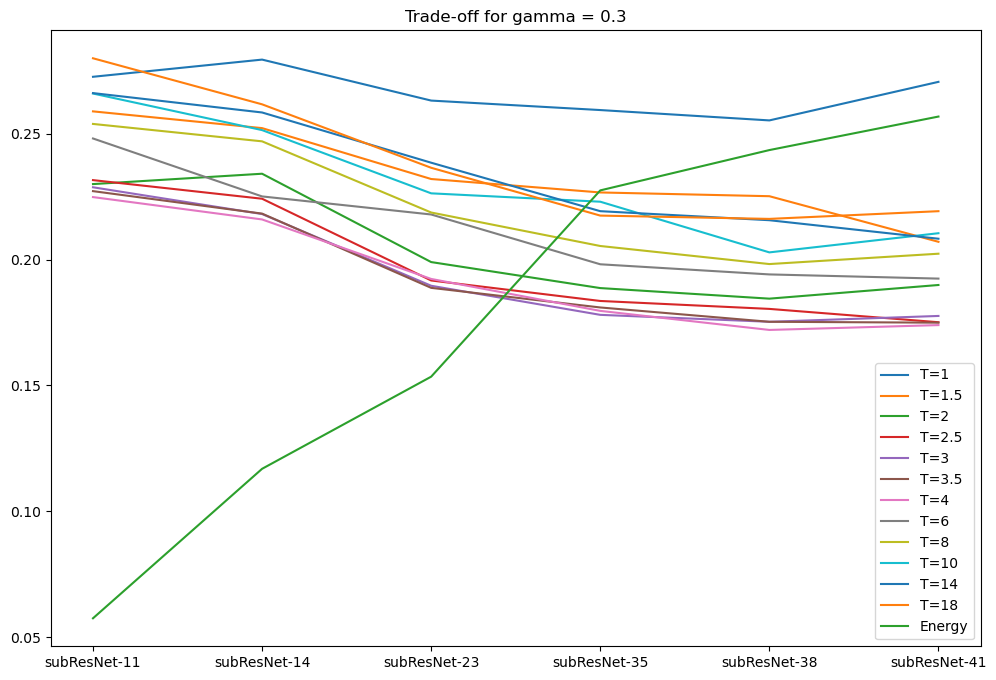

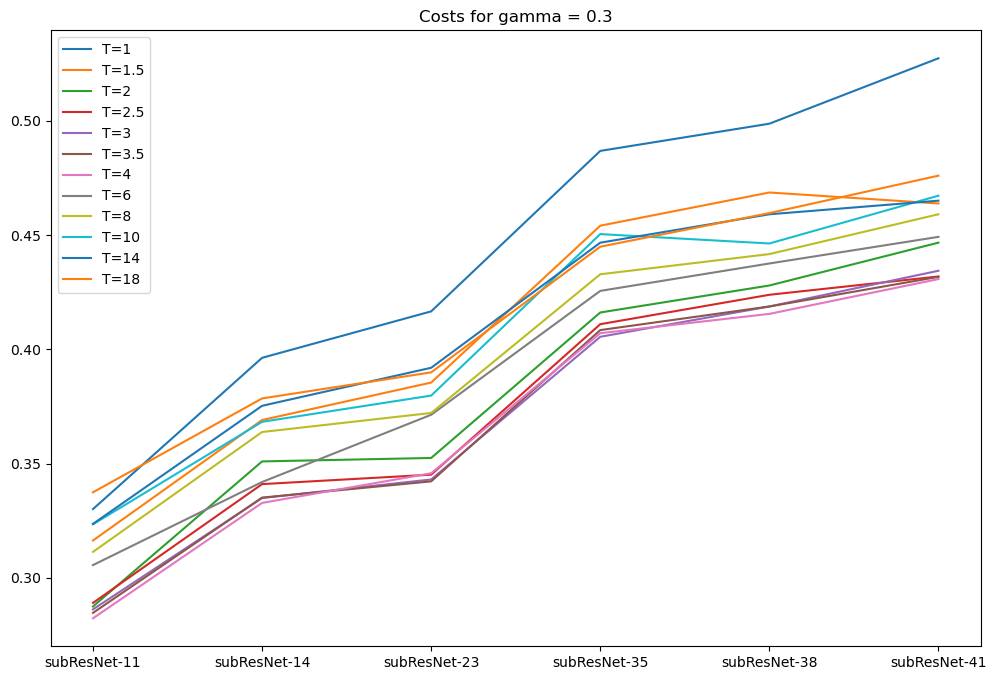

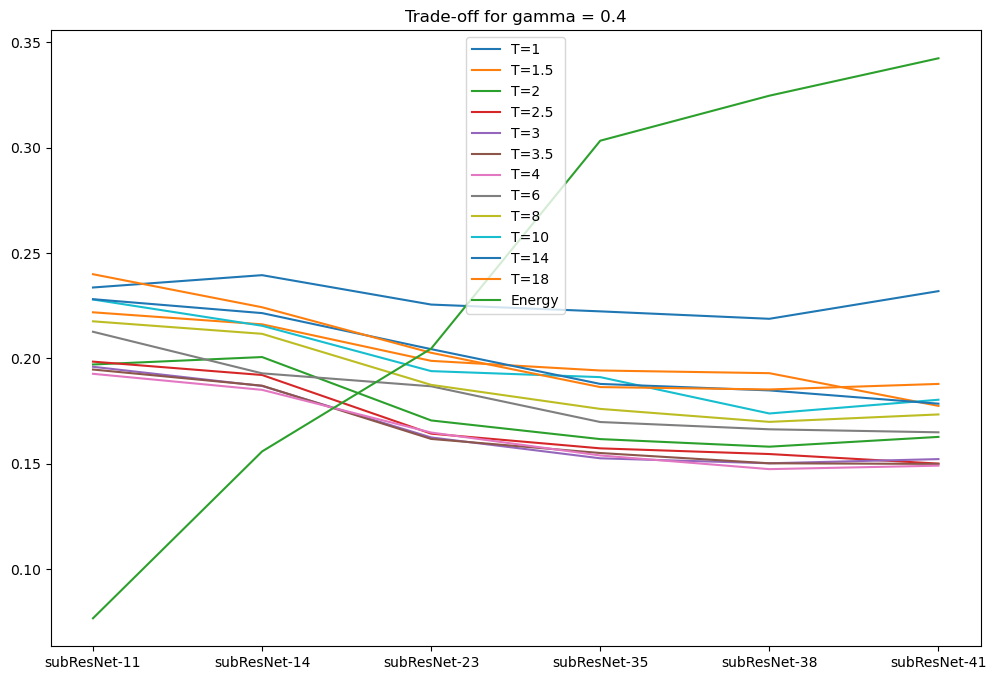

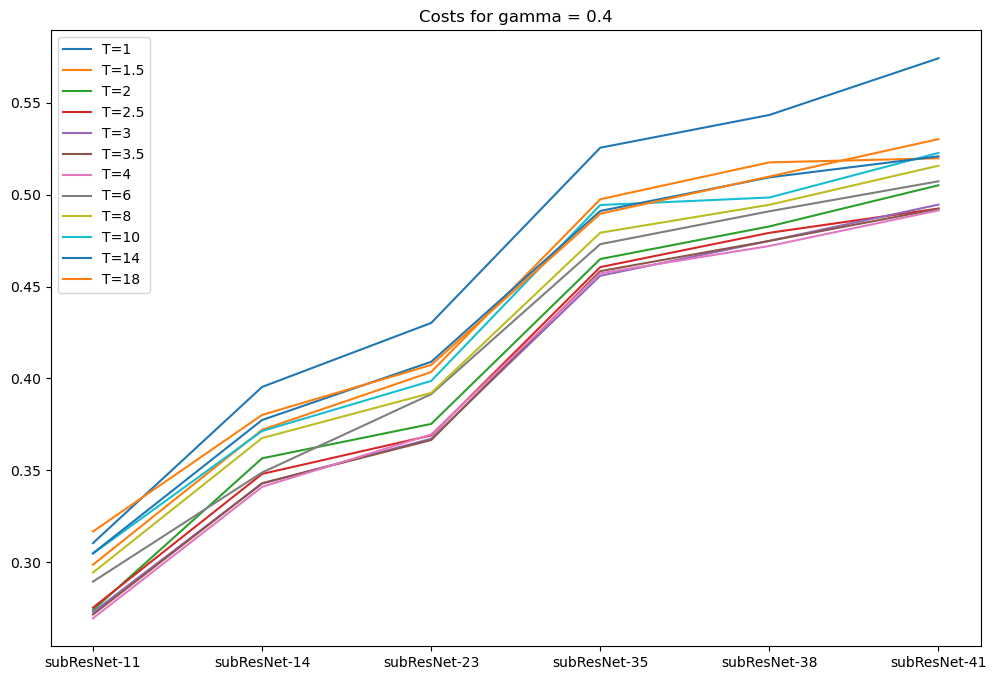

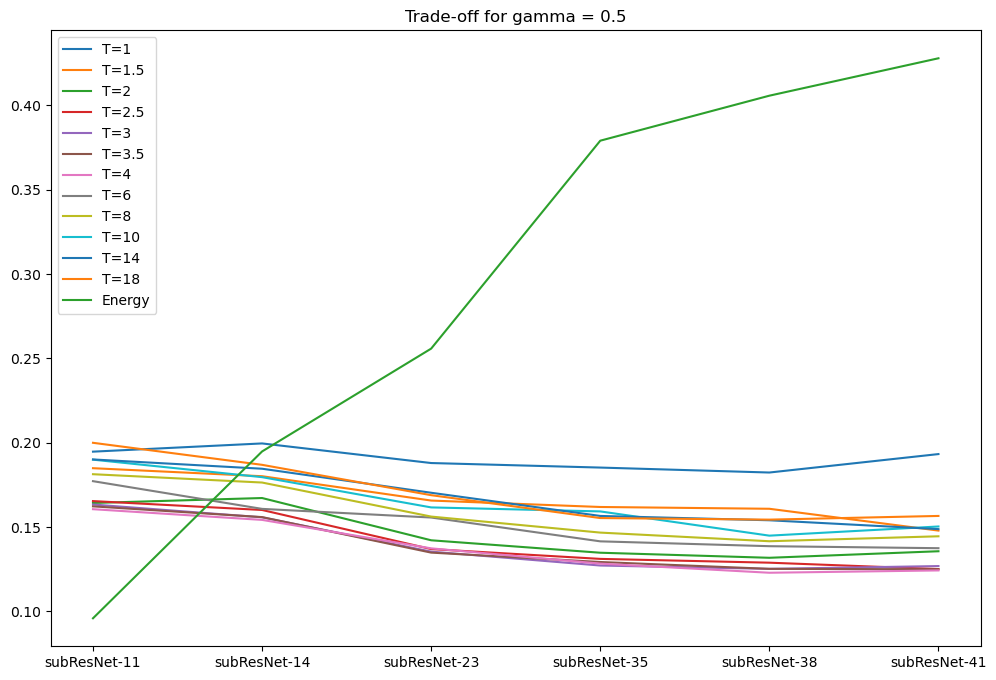

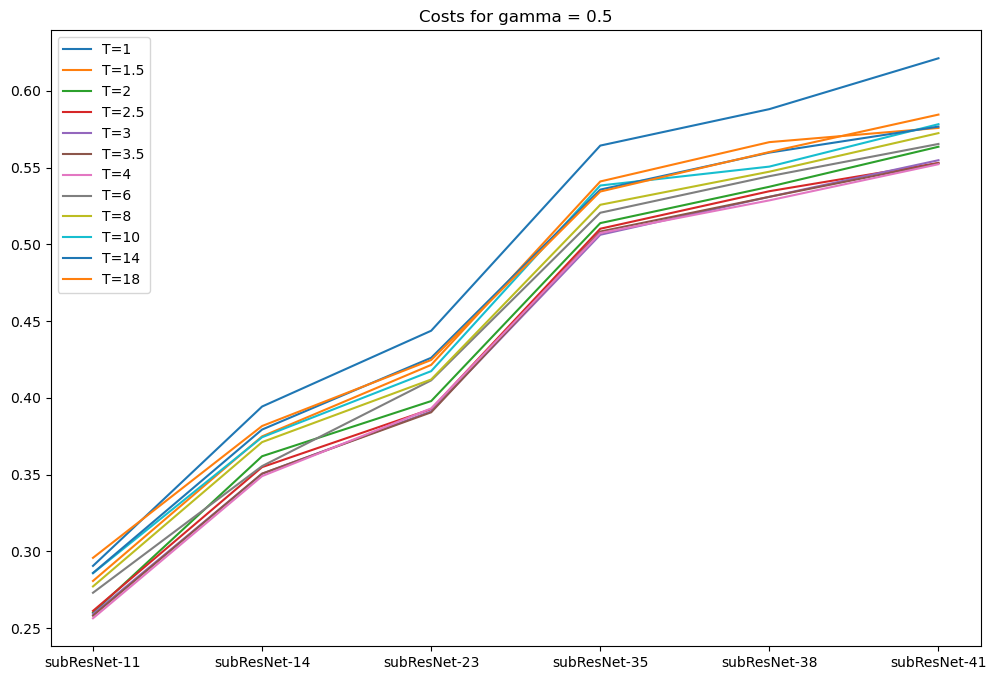

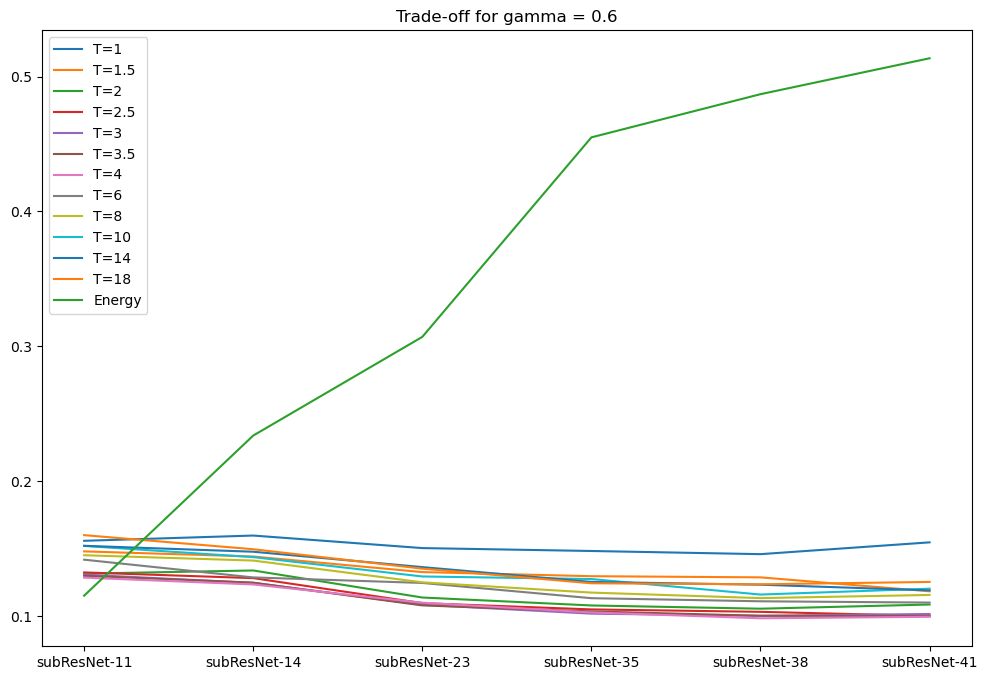

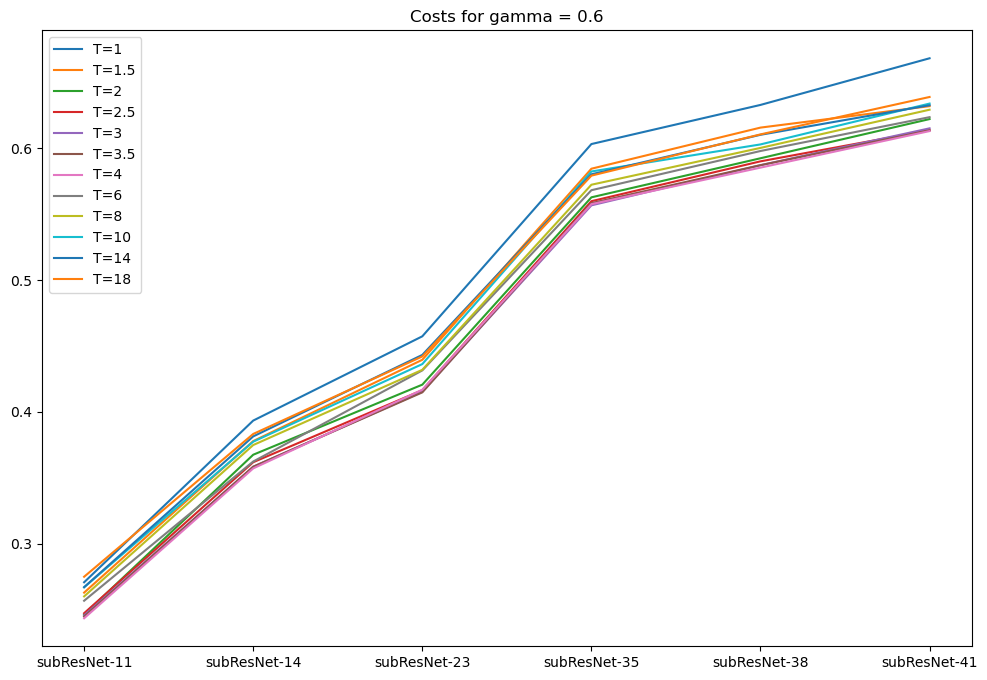

In [27]:
decrementi = df_accuracy.copy()
decrementi_energy = df_energy.copy()

decrementi_energy.Energy = 1 - (teacher_energy - df_energy.Energy)/teacher_energy 

plt.figure(figsize=(12,8))
plt.plot(decrementi['Network'],decrementi_energy['Energy'][:-1])
for c in df_accuracy.columns[1:]:
    decrementi[c] = (teacher_accuracy - df_accuracy[c])/teacher_accuracy
    #decrementi[c] = df_accuracy[c]
    plt.plot(decrementi['Network'],decrementi[c],label=c)
    plt.legend(fontsize=15)
    plt.title('results')

trade_off=pd.DataFrame()
ce = pd.DataFrame()
ca = pd.DataFrame()

gamma_range = [0.1,0.2,0.3,0.4,0.5,0.6]
for gamma in gamma_range:
    trade_off['Network'] = decrementi['Network']
    ca['Network'] = decrementi['Network']
    ce['Network'] = decrementi['Network']

    plt.figure(figsize=(12,8))
    for c in df_accuracy.columns[1:]:
        ce[c] = gamma * decrementi_energy.Energy
        ca[c] =(1-gamma) * decrementi[c]
        #plt.plot(ce['Network'],ce[c],label=c)
        plt.plot(ca['Network'],ca[c],label=c)
    plt.plot(ce['Network'],ce['T=1'],label='Energy')
    plt.legend(fontsize=15)
    plt.title('Trade-off for gamma = ' + str(gamma))



    plt.figure(figsize=(12,8))
    for c in df_accuracy.columns[1:]:
        trade_off[c] = gamma * decrementi_energy.Energy + (1-gamma) * decrementi[c]
        plt.plot(trade_off['Network'],trade_off[c],label=c)
    plt.legend(fontsize=15)
    plt.title('Costs for gamma = ' + str(gamma))

    


